# Infection des régions avec un ratio trop élevé

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely import *
from shapely.wkt import *
import matplotlib.colors as mcolors

In [2]:
# Load the data
file_path = '../../data/processed/processed_enhanced_data_with_presence_region.csv'

df = pd.read_csv(file_path)
gdf = gpd.GeoDataFrame(df, geometry=gpd.GeoSeries.from_wkt(df['geometry']))
gdf.set_crs(epsg=2056, inplace=True)
gdf.set_index("idx", inplace=True)

gdf.head()

,geometry,Altitude,NaturalHabitat,SoilType,WaterRetention,NutrientContent,WaterPermeability,Temperature,Presence,Count,Region
idx,,,,,,,,,,,
35,"POLYGON ((2485071.58 1109261.72, 2486071.58 11...",363.5148,62.0,"orthic Luvisol; eutric, calcaric Cambisol",4.0,6.0,4.0,5.2,0,0,19
36,"POLYGON ((2485071.58 1110261.72, 2486071.58 11...",358.9348,62.0,"orthic Luvisol; eutric, calcaric Cambisol",4.0,6.0,4.0,5.2,0,0,19
261,"POLYGON ((2486071.58 1109261.72, 2487071.58 11...",415.6684,62.0,"eutric, dystric Cambisol; eutric Regosol; spod...",4.0,4.0,4.0,5.3,0,0,7
262,"POLYGON ((2486071.58 1110261.72, 2487071.58 11...",368.5936,62.0,"eutric, dystric Cambisol; eutric Regosol; spod...",4.0,4.0,4.0,5.3,0,0,7
263,"POLYGON ((2486071.58 1111261.72, 2487071.58 11...",352.9472,82.0,"orthic Luvisol; eutric, calcaric Cambisol",4.0,6.0,4.0,5.3,0,0,19


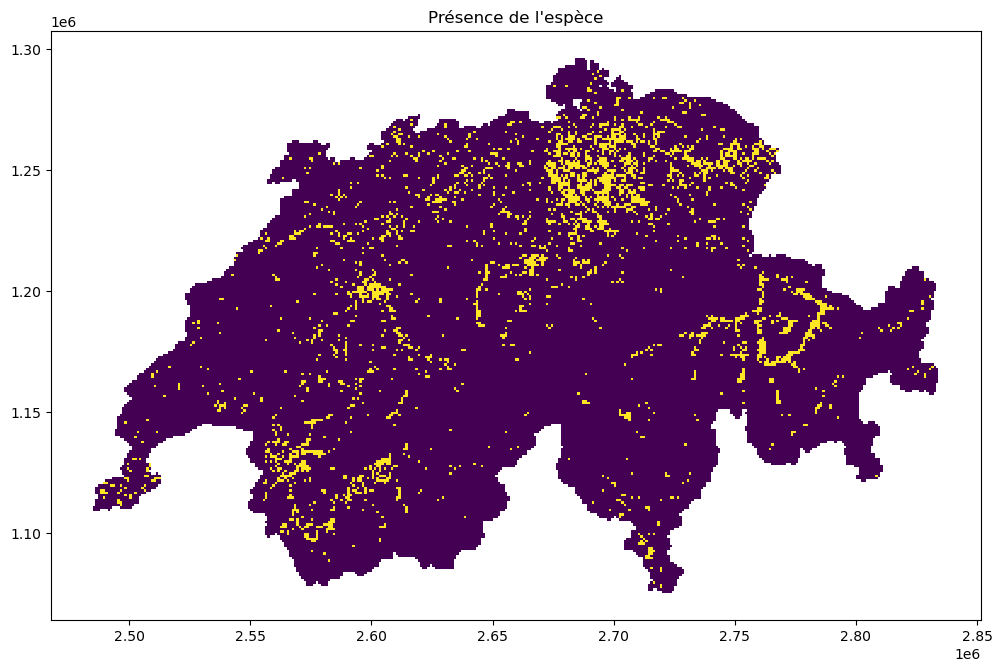

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
gdf.plot(column='Presence', ax=ax, cmap='viridis')
plt.title('Présence de l\'espèce')
plt.show()

In [4]:
# Calcul du ratio de présence par région
lambda_threshold = 0.06

stats = gdf.groupby('Region').agg(
    nombre_de_zones=('Region', 'count'),
    nombre_de_presences=('Presence', 'sum')
).reset_index()

stats['ratio_presences_zones'] = stats['nombre_de_presences'] / stats['nombre_de_zones']
stats['infestee'] = stats['ratio_presences_zones'] > lambda_threshold

stats.sort_values('ratio_presences_zones', ascending=False)

,Region,nombre_de_zones,nombre_de_presences,ratio_presences_zones,infestee
13,13,1546,297,0.192109,True
29,29,974,157,0.161191,True
19,19,1037,151,0.145612,True
28,28,1227,173,0.140994,True
6,6,883,123,0.139298,True
5,5,2593,355,0.136907,True
26,26,1100,141,0.128182,True
11,11,1047,131,0.125119,True
7,7,2110,257,0.121801,True
23,23,1100,124,0.112727,True


In [5]:
# Fusion des données de présence avec les statistiques
#gdf.drop(columns=['infestee'], inplace=True)
gdf = gdf.merge(stats[['Region', 'infestee']], on='Region', how='left')
gdf = gdf.merge(stats[['Region', 'ratio_presences_zones']], on='Region', how='left')

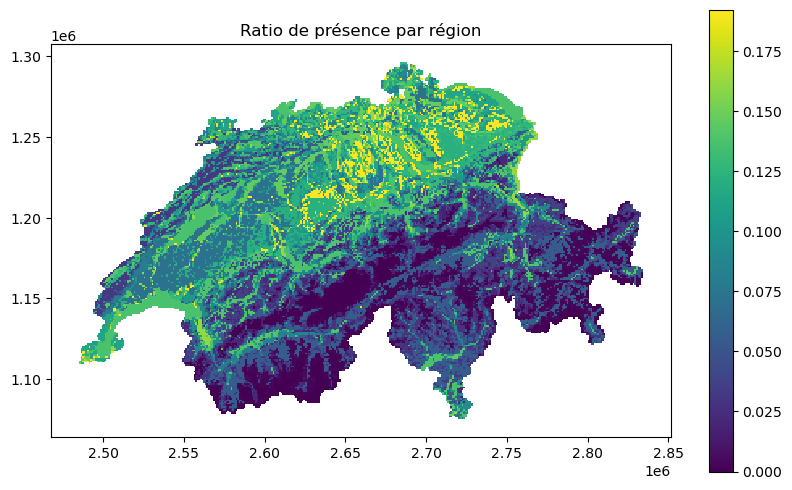

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='ratio_presences_zones', ax=ax, cmap='viridis', legend=True, legend_kwds={'shrink': 0.6})
plt.title('Ratio de présence par région')
plt.show()

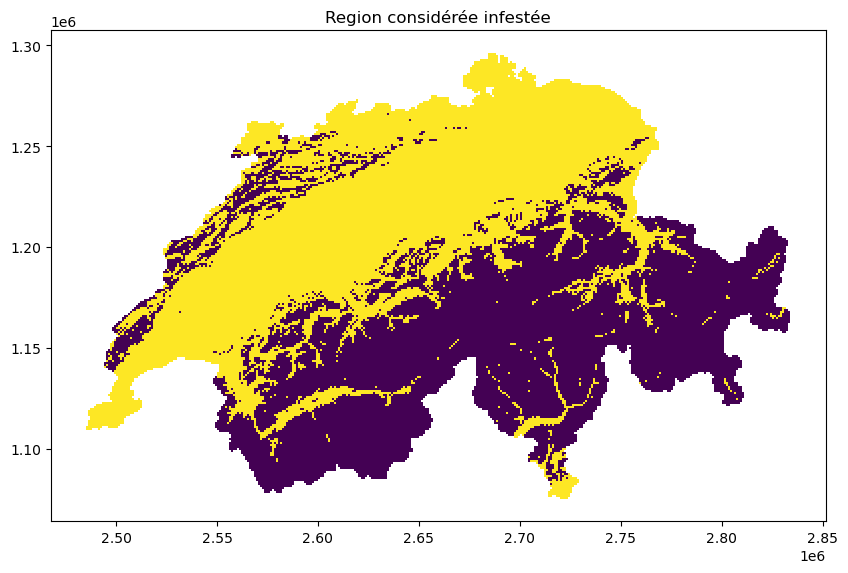

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='infestee', ax=ax, cmap='viridis')
plt.title('Region considérée infestée')
plt.show()

La région 5 est la région qui contient les différents lacs

Il est intéressant de voir qu'elle a un ratio de présence très élevé par rapport aux autres régions (ratio de 0.136907) (6ème région la plus infestée)

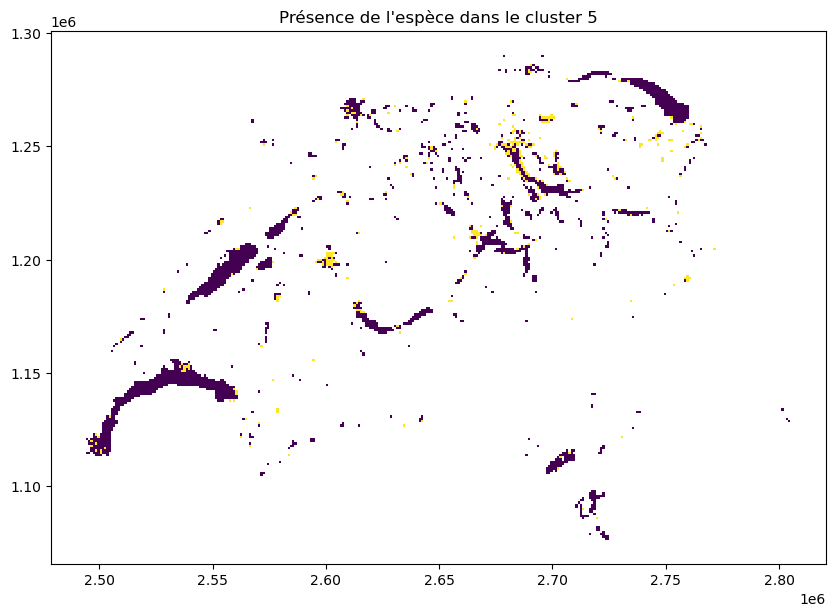

In [8]:
gdf_region_5 = gdf[gdf['Region'] == 5]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_region_5.plot(column='Presence', ax=ax, cmap='viridis')
plt.title('Présence de l\'espèce dans le cluster 5')
plt.show()

On note que les points infectés sont des bords de grands lacs ou des points qui ont été attribués à la région 5